# Продажи недвижимости в России (поиск выбросов)
**Источник:** <br>https://www.kaggle.com/
<br>
<br>
**Цели:** <br>● провести предобработку данных, для последующего их удобного анализа
<br>
● проанализировать данные в соответсвии с имеющимися задачами
<br>
<br>
**Задачи:** <br>● добавить дополнительные колонки
<br>● изучить следующие параметры: площадь, цена, число комнат
<br>● убрать редкие и выбивающиеся значения
<br>● выделить факторы, которые влияют на стоимость квартиры.
<br>
<br>
**Входные данные:** <br>входные данные представляют собой файл csv, содержащий в себе информацию недвижимости 2х регионов
<br>
<br>
**Используемые библиотеки:** <br>pandas
<br>numpy
<br>re
<br>matplotlib.pyplot
<br>seaborn
<br>pathlib
<br>
<br>
Для начала импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path  

Считаем данные и запишем их в df:

In [2]:
df = pd.read_csv("out.csv")

Выведем основную информацию об имеющихся данных:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792869 entries, 0 to 792868
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     792869 non-null  int64  
 1   price          792869 non-null  int64  
 2   date           792869 non-null  object 
 3   time           792869 non-null  object 
 4   geo_lat        792869 non-null  float64
 5   geo_lon        792869 non-null  float64
 6   region         792869 non-null  int64  
 7   building_type  792869 non-null  int64  
 8   level          792869 non-null  int64  
 9   levels         792869 non-null  int64  
 10  rooms          792869 non-null  int64  
 11  area           792869 non-null  float64
 12  kitchen_area   792869 non-null  float64
 13  object_type    792869 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 84.7+ MB


Данные представляют из себя 792869 строк и 14 столбцов. Типы данных соответсвуют значениям. Посмотрим как выглядят наши данные:

In [4]:
df.head()

,Unnamed: 0,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
1,19,1650000,2018-03-16,16:21:54,44.994301,41.122810,2843,3,5,5,2,51.0,7.0,1
2,32,2500000,2018-04-04,19:37:22,43.634694,39.727167,2843,2,2,8,-1,25.0,5.0,1
3,37,3160000,2018-04-11,15:58:47,55.172116,61.279772,5282,3,13,16,2,56.0,11.0,11
4,46,2600000,2018-04-23,09:53:29,45.003174,39.079931,2843,4,3,5,2,46.0,8.0,1


Выведем минимальные значения по каждому столбцу, чтобы предварительно выкинутьв все данные, которые точно являются ошибочными (так например площадь квартиры не модет быть отрицательна)

In [5]:
df.min()

Unnamed: 0                 3
price            -1964967296
date              2018-03-01
time                00:00:00
geo_lat             43.38616
geo_lon            36.651035
region                  2843
building_type              0
level                      1
levels                     1
rooms                     -2
area                    0.07
kitchen_area            0.04
object_type                1
dtype: object

In [6]:
df.max()

Unnamed: 0          5476992
price            2089477704
date             2021-05-01
time               23:59:59
geo_lat           56.290755
geo_lon           62.988466
region                 5282
building_type             5
level                    36
levels                   38
rooms                     9
area                 7625.0
kitchen_area         8235.0
object_type              11
dtype: object

Поймем, что цена должна быть больше 0, также количество комнат должно быть больше -1 и меньше 40.
Помимо этого площадь квартиры не должна быть меньше 0, а также не должна превышать 2000.
Выводы про количество комнат и площадь квартиры сделала изучив следующие источники:

https://iz.ru/1397299/2022-09-19/uchastniki-rynka-rasskazali-o-samom-malenkom-i-samom-prostornom-zhile-v-moskve?ysclid=l96np6np3b583735369
https://rg.ru/2021/03/09/reg-szfo/nazvany-gabarity-samyh-bolshih-kvartir-v-strane.html?ysclid=l96nqv6gc6327639024
https://www.cian.ru/stati-samye-bolshie-kvartiry-moskvy-289806/
https://www.mirkvartir.ru/journal/analytics/2016/08/22/samaa-mnogokomnatnaa-kvartira-v-rossii-sostoit-iz-20-pomesenii/?ysclid=l96nudmjx7998159780

Это лишь предварительное удаление выбросов, чтобы потом удобнее было анализироват графики и диаграммы

In [7]:
df = df.query("price > 0")
df = df.query("rooms >= -1 and rooms < 40")
df = df.query("area > 0 and area < 2000")

Создадим новый столбец, в который поместим цену за квадратный метр. Для этого для каждой строки разделим цену на площадь:

In [8]:
def f(x, y):
    return x/y
df["prise_meter"] = df.apply(lambda x: f(x.price, x.area), axis=1)



Проверим

In [9]:
df.head()

,Unnamed: 0,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,prise_meter
0,3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,48684.210526
1,19,1650000,2018-03-16,16:21:54,44.994301,41.122810,2843,3,5,5,2,51.0,7.0,1,32352.941176
2,32,2500000,2018-04-04,19:37:22,43.634694,39.727167,2843,2,2,8,-1,25.0,5.0,1,100000.000000
3,37,3160000,2018-04-11,15:58:47,55.172116,61.279772,5282,3,13,16,2,56.0,11.0,11,56428.571429
4,46,2600000,2018-04-23,09:53:29,45.003174,39.079931,2843,4,3,5,2,46.0,8.0,1,56521.739130


Создадим также столбец "month", в котором будет храниться не вся дата, а лишь месяц публикации объявления:

In [10]:
df["month"] = df["date"].apply(lambda x: x[-5:-3])

Аналогично этому создадим и столбец "year", хранящий год публикации:

In [11]:
df["year"] = df["date"].apply(lambda x: x[0:4])

Проверим, выведя всю таблицу:

In [12]:
df.head()

,Unnamed: 0,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,prise_meter,month,year
0,3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,48684.210526,03,2018
1,19,1650000,2018-03-16,16:21:54,44.994301,41.122810,2843,3,5,5,2,51.0,7.0,1,32352.941176,03,2018
2,32,2500000,2018-04-04,19:37:22,43.634694,39.727167,2843,2,2,8,-1,25.0,5.0,1,100000.000000,04,2018
3,37,3160000,2018-04-11,15:58:47,55.172116,61.279772,5282,3,13,16,2,56.0,11.0,11,56428.571429,04,2018
4,46,2600000,2018-04-23,09:53:29,45.003174,39.079931,2843,4,3,5,2,46.0,8.0,1,56521.739130,04,2018


Помимо этого создадим столбец "flat", в который мы запишем 0, если квартира располагается на первом этаже, 1 - если на последнем, а 2, когда квартира находится на любом другом этаже:

In [13]:
def f(l1, l2):
    if l1 == l2:
        return 1
    if l1 == 1:
        return 0
    else:
        return 2

df["flat"] = df.apply(lambda x: f(x.level, x.levels), axis=1)

Проверка:

In [14]:
df.head()

,Unnamed: 0,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,prise_meter,month,year,flat
0,3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,48684.210526,03,2018,2
1,19,1650000,2018-03-16,16:21:54,44.994301,41.122810,2843,3,5,5,2,51.0,7.0,1,32352.941176,03,2018,1
2,32,2500000,2018-04-04,19:37:22,43.634694,39.727167,2843,2,2,8,-1,25.0,5.0,1,100000.000000,04,2018,2
3,37,3160000,2018-04-11,15:58:47,55.172116,61.279772,5282,3,13,16,2,56.0,11.0,11,56428.571429,04,2018,2
4,46,2600000,2018-04-23,09:53:29,45.003174,39.079931,2843,4,3,5,2,46.0,8.0,1,56521.739130,04,2018,2


Заметим, что у нас образовалось достаточно много лишних столбцов, которые можно удалить. Так например нам не нужны столбцы "Unnamed: 0", "date", "time", "geo_lat", "geo_lon", "level", "levels", "kitchen_area". Избавимся от них:

In [15]:
df = df.drop(["Unnamed: 0", "date", "time", "geo_lat", "geo_lon", "level", "levels", "kitchen_area" ], axis=1)


Повторно выведем основную информацию о наших данных, с учетом добаленных столбцов:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792814 entries, 0 to 792868
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          792814 non-null  int64  
 1   region         792814 non-null  int64  
 2   building_type  792814 non-null  int64  
 3   rooms          792814 non-null  int64  
 4   area           792814 non-null  float64
 5   object_type    792814 non-null  int64  
 6   prise_meter    792814 non-null  float64
 7   month          792814 non-null  object 
 8   year           792814 non-null  object 
 9   flat           792814 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 66.5+ MB


Заметим, что у столбиков "year" и "month" тип данных "object", хотя в них храняться данные типа "int". Исправим это

In [17]:
df["year"] = df["year"].astype(int)
df["month"].astype(int)

0         3
1         3
2         4
3         4
4         4
         ..
792864    5
792865    5
792866    5
792867    5
792868    5
Name: month, Length: 792814, dtype: int64

Разобьем наши данные на 2 датасета по значению региона для дальнейшего их анализа

In [18]:
df1 = df.query("region == 2843")
df = df.query("region != 2843")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155644 entries, 3 to 792868
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          155644 non-null  int64  
 1   region         155644 non-null  int64  
 2   building_type  155644 non-null  int64  
 3   rooms          155644 non-null  int64  
 4   area           155644 non-null  float64
 5   object_type    155644 non-null  int64  
 6   prise_meter    155644 non-null  float64
 7   month          155644 non-null  object 
 8   year           155644 non-null  int64  
 9   flat           155644 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.1+ MB


из-за того, что построение графиков и диаграмм для датасета размером 155644 строк занимает очень много времени, я оставляю всего 10000 строк в каждом датасете.
<br>В первую очередь проанализирую данные по Челябинской области:

In [19]:
np.random.seed(145644)
to_remove = np.random.choice(df.index,size=145644,replace=False)
df = df.drop(to_remove)
df.head()

,price,region,building_type,rooms,area,object_type,prise_meter,month,year,flat
508,1800000,5282,3,2,53.0,1,33962.264151,09,2018,0
537,2600000,5282,1,3,65.6,11,39634.146341,09,2018,2
559,1600000,5282,3,3,62.0,1,25806.451613,09,2018,2
565,1400000,5282,3,1,41.0,1,34146.341463,09,2018,2
570,1650000,5282,3,2,43.0,1,38372.093023,09,2018,2


Построю гистограммы для каждого из следующих параметров: площадь, цена, число комнат

/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

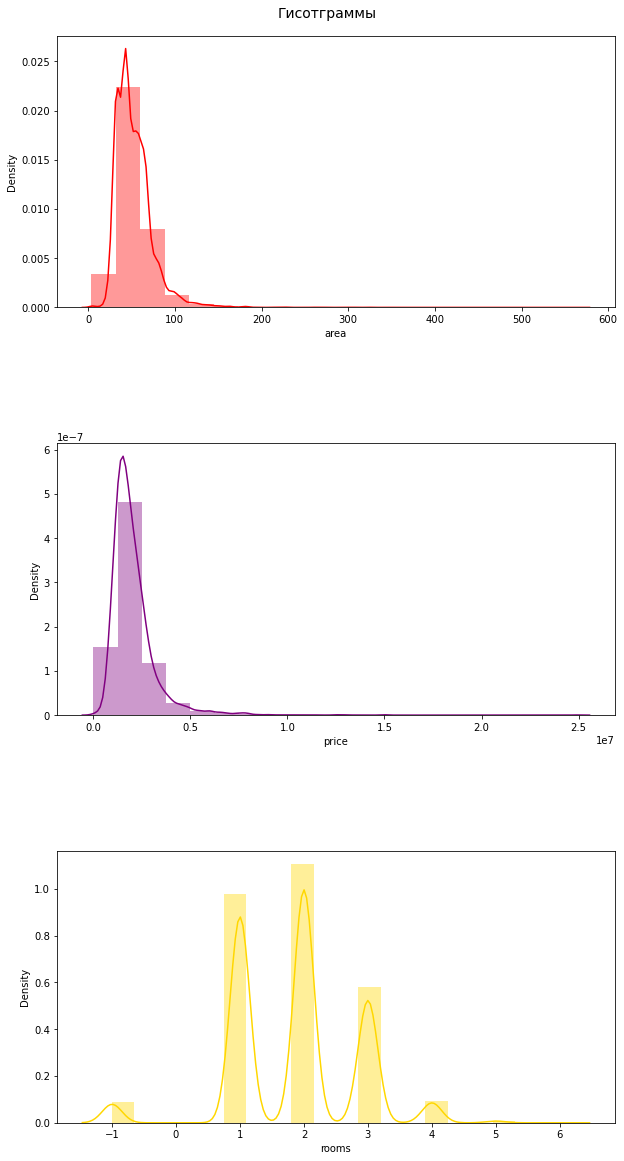

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(10, 20))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle("Гисотграммы", fontsize=14, y=0.9)

def painting(column: str, col: str, axs: list):
    """
    Функция получает на вход столбец, цвет и позицию, рисует гистограмму по полученным данным
    """
    sns.distplot( a = df[column], hist = True, kde = True, rug = False, bins=20,  color= col, ax = axs)
    

column = ["area", "price", "rooms"]
col = ["red", "purple", "gold"]
for i in range(len(column)): 
    painting(column[i], col[i], axs[i])



Можно заметить, что площадь колеблится примерно от 15 до 100, причем мода графика примерно равна 50 м2
<br>Второй график похож на параболлу, при этом часть от 0,25 далее как гипербола стремится к оси. При этом значения примерно от 0.01 * 1е7  до 0.6 * 1е7 
<br>Третий график показывает, что чаще всего квартира имеет 2 комнаты, менее популярна 1 комната, затем 3 и наконец 4 комнаты и студия (их частота примерно одинакова)что касается 5 комант, такое встречается очень редко

Построим диаграммы размаха, чтобы избавиться от выбросов

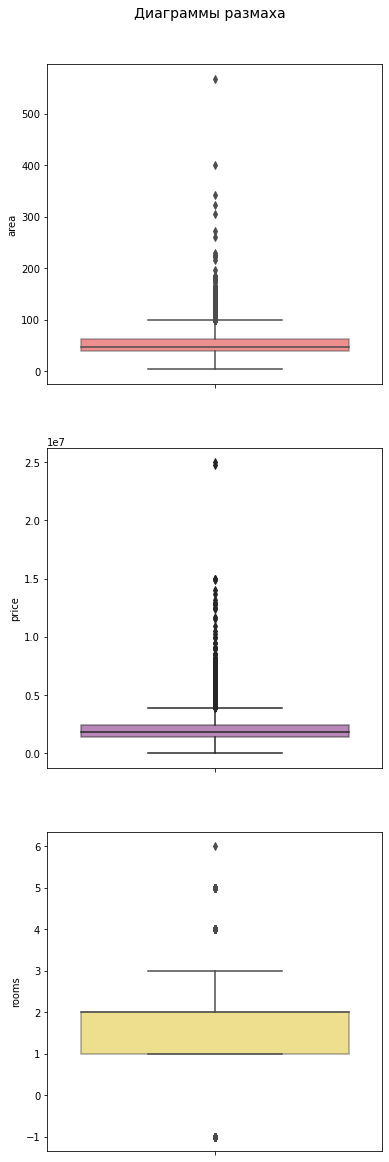

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(6, 20))
plt.subplots_adjust(hspace=0.2)
fig.suptitle("Диаграммы размаха", fontsize=14, y=0.92)

def painting(column, col, axs):
    """
    Функция получает на вход столбец, цвет и позицию, рисует диаграмму размаха по полученным данным
    """
    sns.boxplot(y=df[column], color= col, ax = axs,  boxprops=dict(alpha=.5))
    
    
column = ["area", "price", "rooms"]
col = ["red", "purple", "gold"]
for i in range(len(column)): 
    painting(column[i], col[i], axs[i])
    

Заметим, что на каждой диаграмме есть выбросы. Избавимся от них:

In [22]:

Q1 =  df["area"].quantile(0.3)
Q3 = df["area"].quantile(0.7)
IQR = Q3 - Q1
df = df.query("@Q1 - 1.5*@IQR < area < @Q3 + 1.5*@IQR")
Q1 =  df["price"].quantile(0.3)
Q3 = df["price"].quantile(0.7)
IQR = Q3 - Q1
df = df.query("@Q1 - 1.5*@IQR < price < @Q3 + 1.5*@IQR")
Q1 =  df["rooms"].quantile(0.25)
Q3 = df["rooms"].quantile(0.75)
IQR = Q3 - Q1
df = df.query("@Q1 - 1.5*@IQR < rooms < @Q3 + 1.5*@IQR")



Еще раз построим диаграммы размаха и убедимся, что больше выбросов нет:

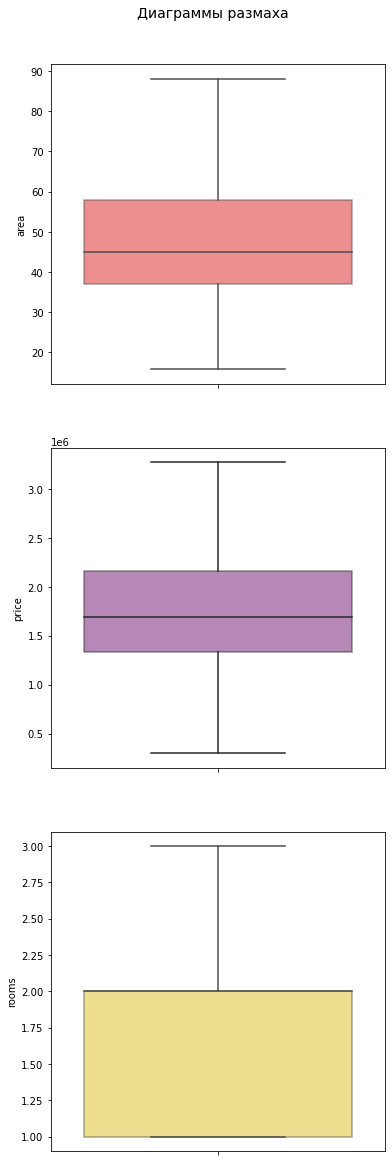

In [23]:
fig, axs = plt.subplots(3, 1, figsize=(6, 20))
plt.subplots_adjust(hspace=0.2)
fig.suptitle("Диаграммы размаха", fontsize=14, y=0.92)

def painting(column, col, axs):
    """
    Функция получает на вход столбец, цвет и позицию, рисует диаграмму размаха по полученным данным
    """
    sns.boxplot(y=df[column], color= col, ax = axs,  boxprops=dict(alpha=.5))
    
    
column = ["area", "price", "rooms"]
col = ["red", "purple", "gold"]
for i in range(len(column)): 
    painting(column[i], col[i], axs[i])

Теперь создадим сводную таблицу, гле для каждого месяца посчитаем среднюю цену

In [24]:
df2 = pd.pivot_table(df,
               index = ["month"],
               values = ["price"],
               aggfunc = [np.median])
df2.head(12)
df2["month"] = [int(i) for i in range(1, 13)]


Выведем полученную таблицу:

In [25]:
df2.columns = ["price", "month"]
df2.head()


,price,month
month,,
01,1670000,1
02,1700000,2
03,1720000,3
04,1750000,4
05,1720000,5


Построим линейную диаграмму по данным из новой таблицы:

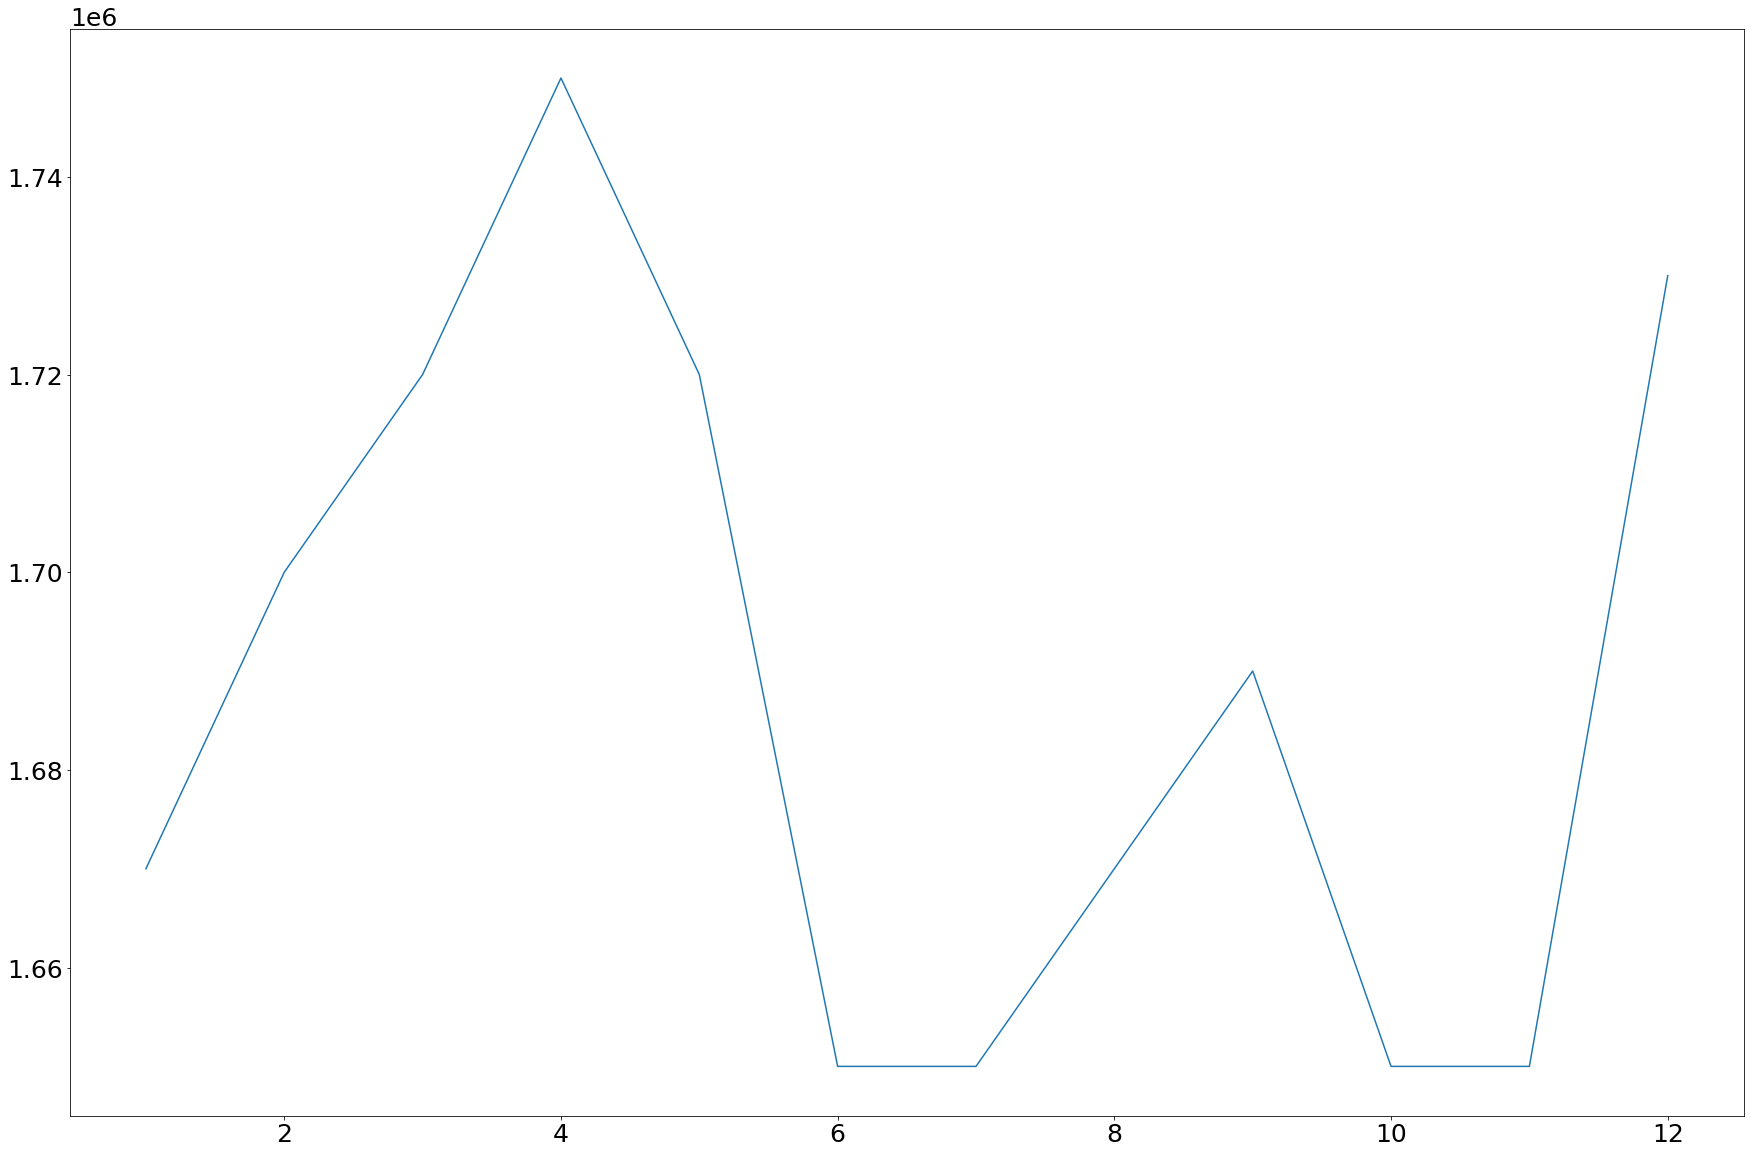

In [26]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(30)
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 25}
plt.rc('font', **font)

plt.plot(df2["month"], df2['price'])

plt.show()

Из графика видно, что минимальная цена приходиться на 7 и 11 месяцы, а максимальная на 4. Теперь построим корреляционную матрицу:

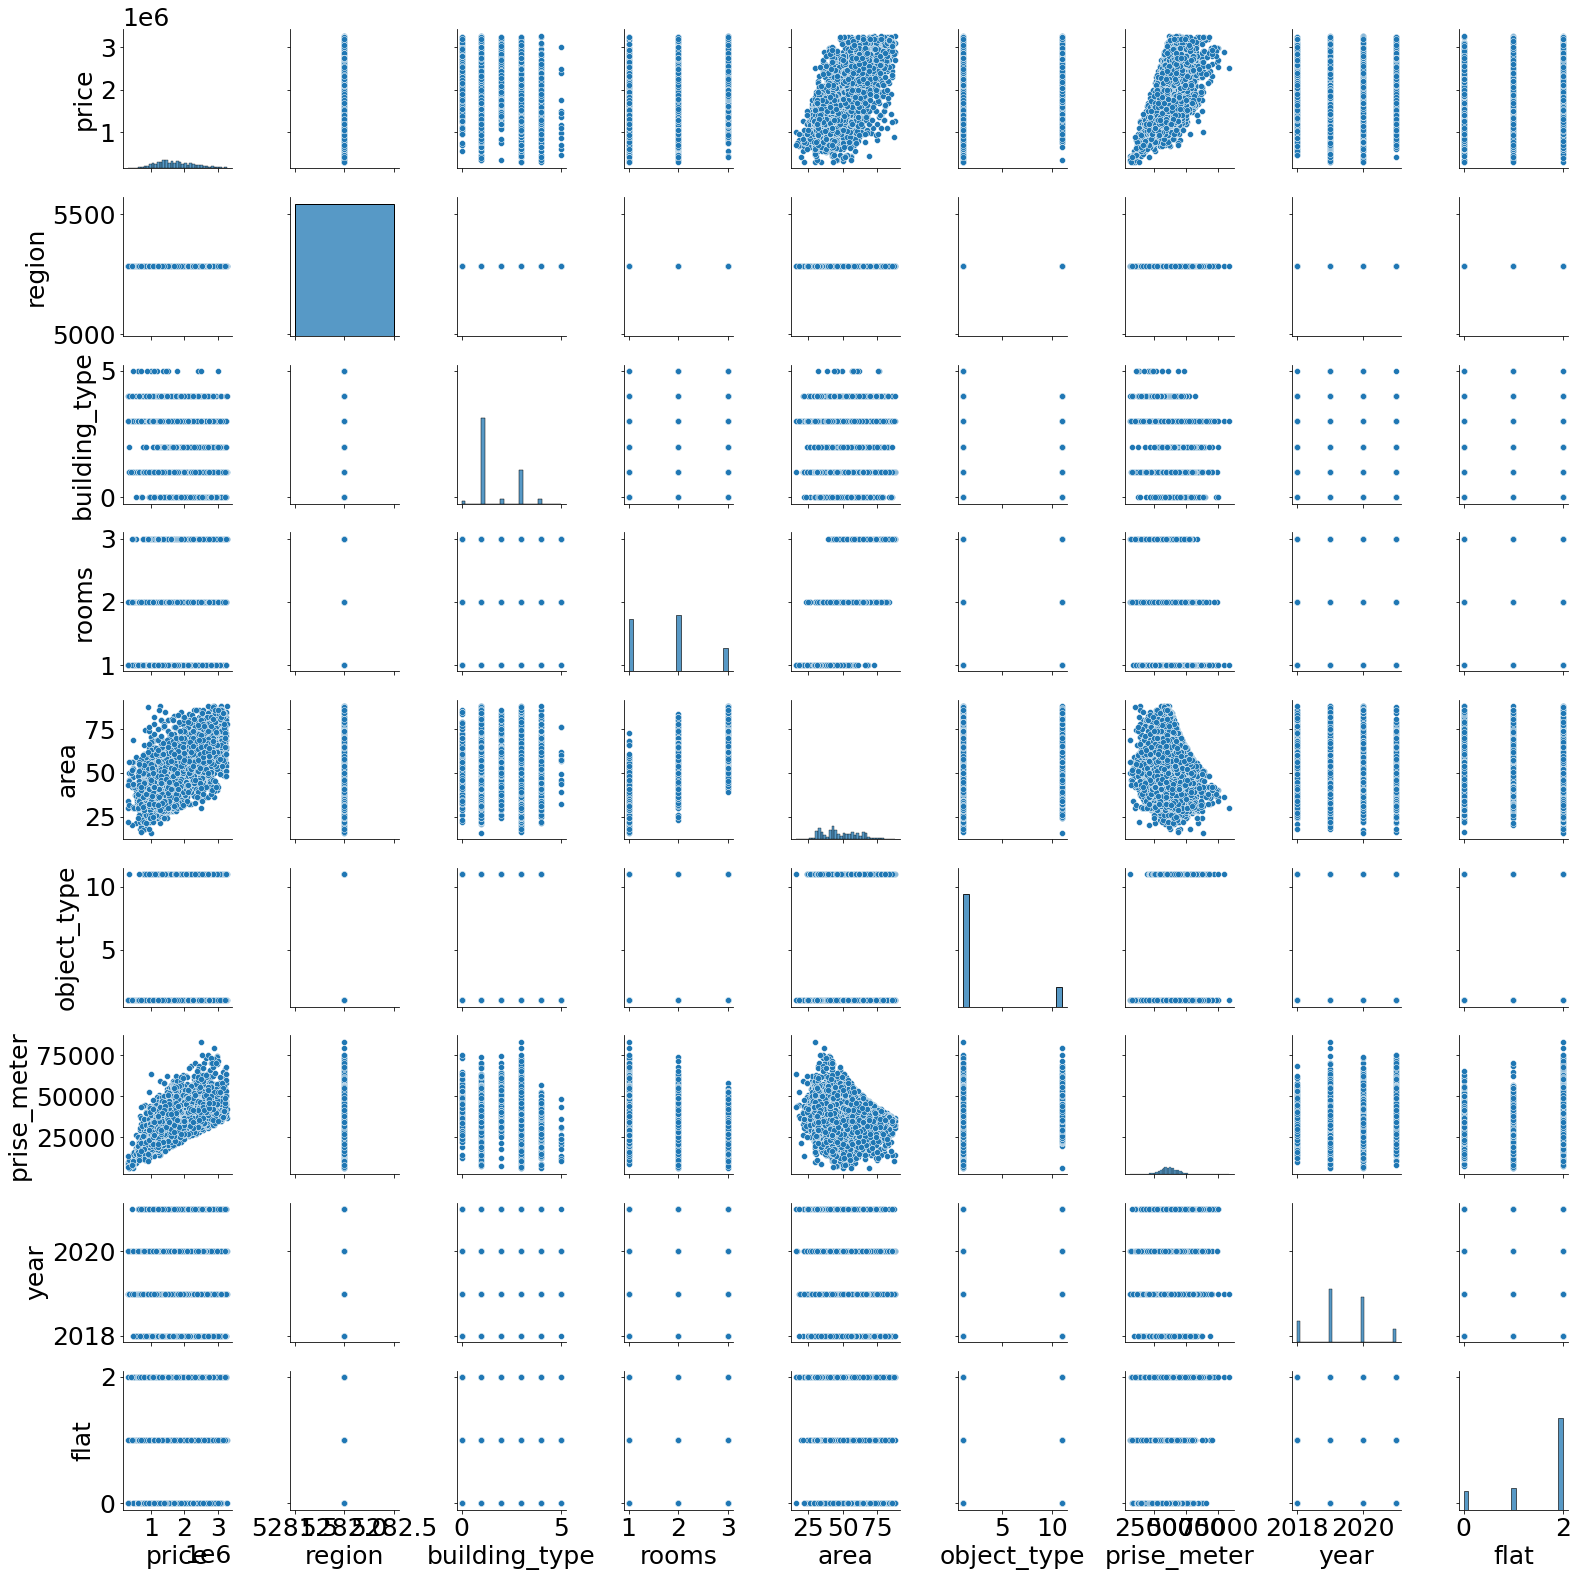

In [27]:
sns.pairplot(df)


По ней построим тепловую карту:

<AxesSubplot:>

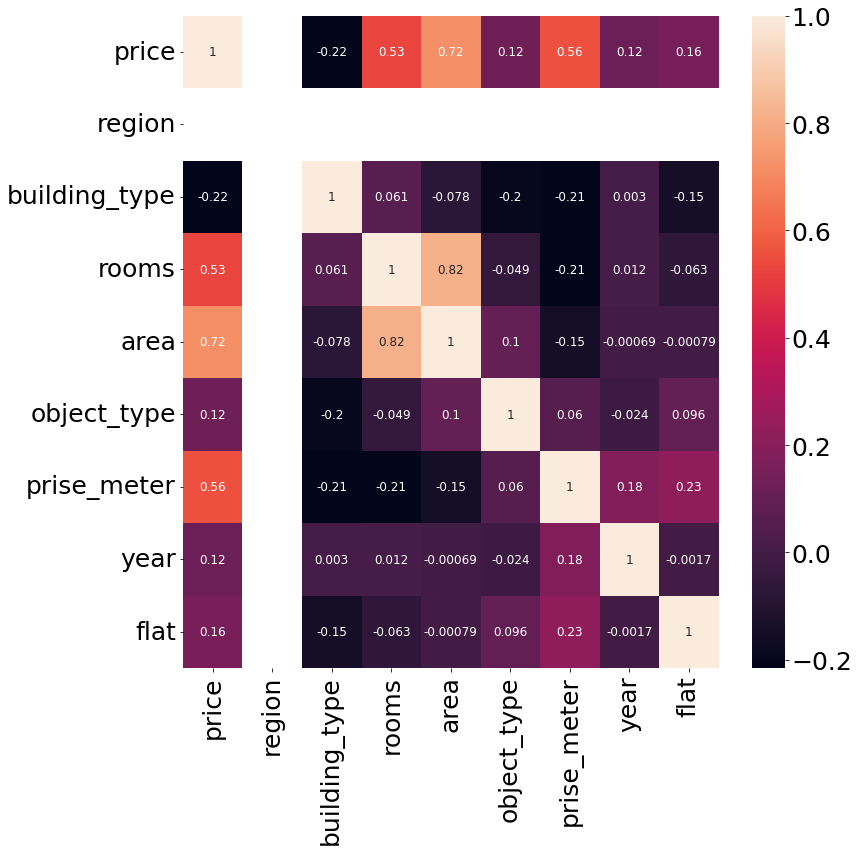

In [28]:
fig, (ax1) = plt.subplots( figsize=(12,12))
sns.heatmap(df.corr(), annot = True,  annot_kws={'fontsize':12})

Проанализирем тепловую диаграмму:
<br>от года мало что зависит, там все строчка/столбец примерно одинаковы
<br>этаж в большей/меньшей степени зависит от типа здания, в котором она находится. и в обратной степени от <br>цены за квадратный метр, при этом этаж примерно одинаково зависит от года а и количества комнат
<br>площадь мало/много зависит от этажа. при этом площадь примерно одинаково зависит от года и этажа, 
а от цены в наименьшей/наибольшей степени зависит площадь, немного больше/меньше, но на одном уровне от количества комнат и стоимости одного метра
<br>запомним, что возможно будет полезно удалить столбец rooms, когда будем предсказывать цену
<br>Построим диаграммы рассеяния:

/var/folders/rt/mvnmln8j70d9fmnh5b6pl1qr0000gn/T/ipykernel_95135/3135912032.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'price', s, "", data=df, linestyle='', marker='o', markersize=0.7, color= col)
/var/folders/rt/mvnmln8j70d9fmnh5b6pl1qr0000gn/T/ipykernel_95135/3135912032.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'price', s, "", data=df, linestyle='', marker='o', markersize=0.7, color= col)
/var/folders/rt/mvnmln8j70d9fmnh5b6pl1qr0000gn/T/ipykernel_95135/3135912032.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'price', s, "", data=df, linestyle='', marker='o', markersi

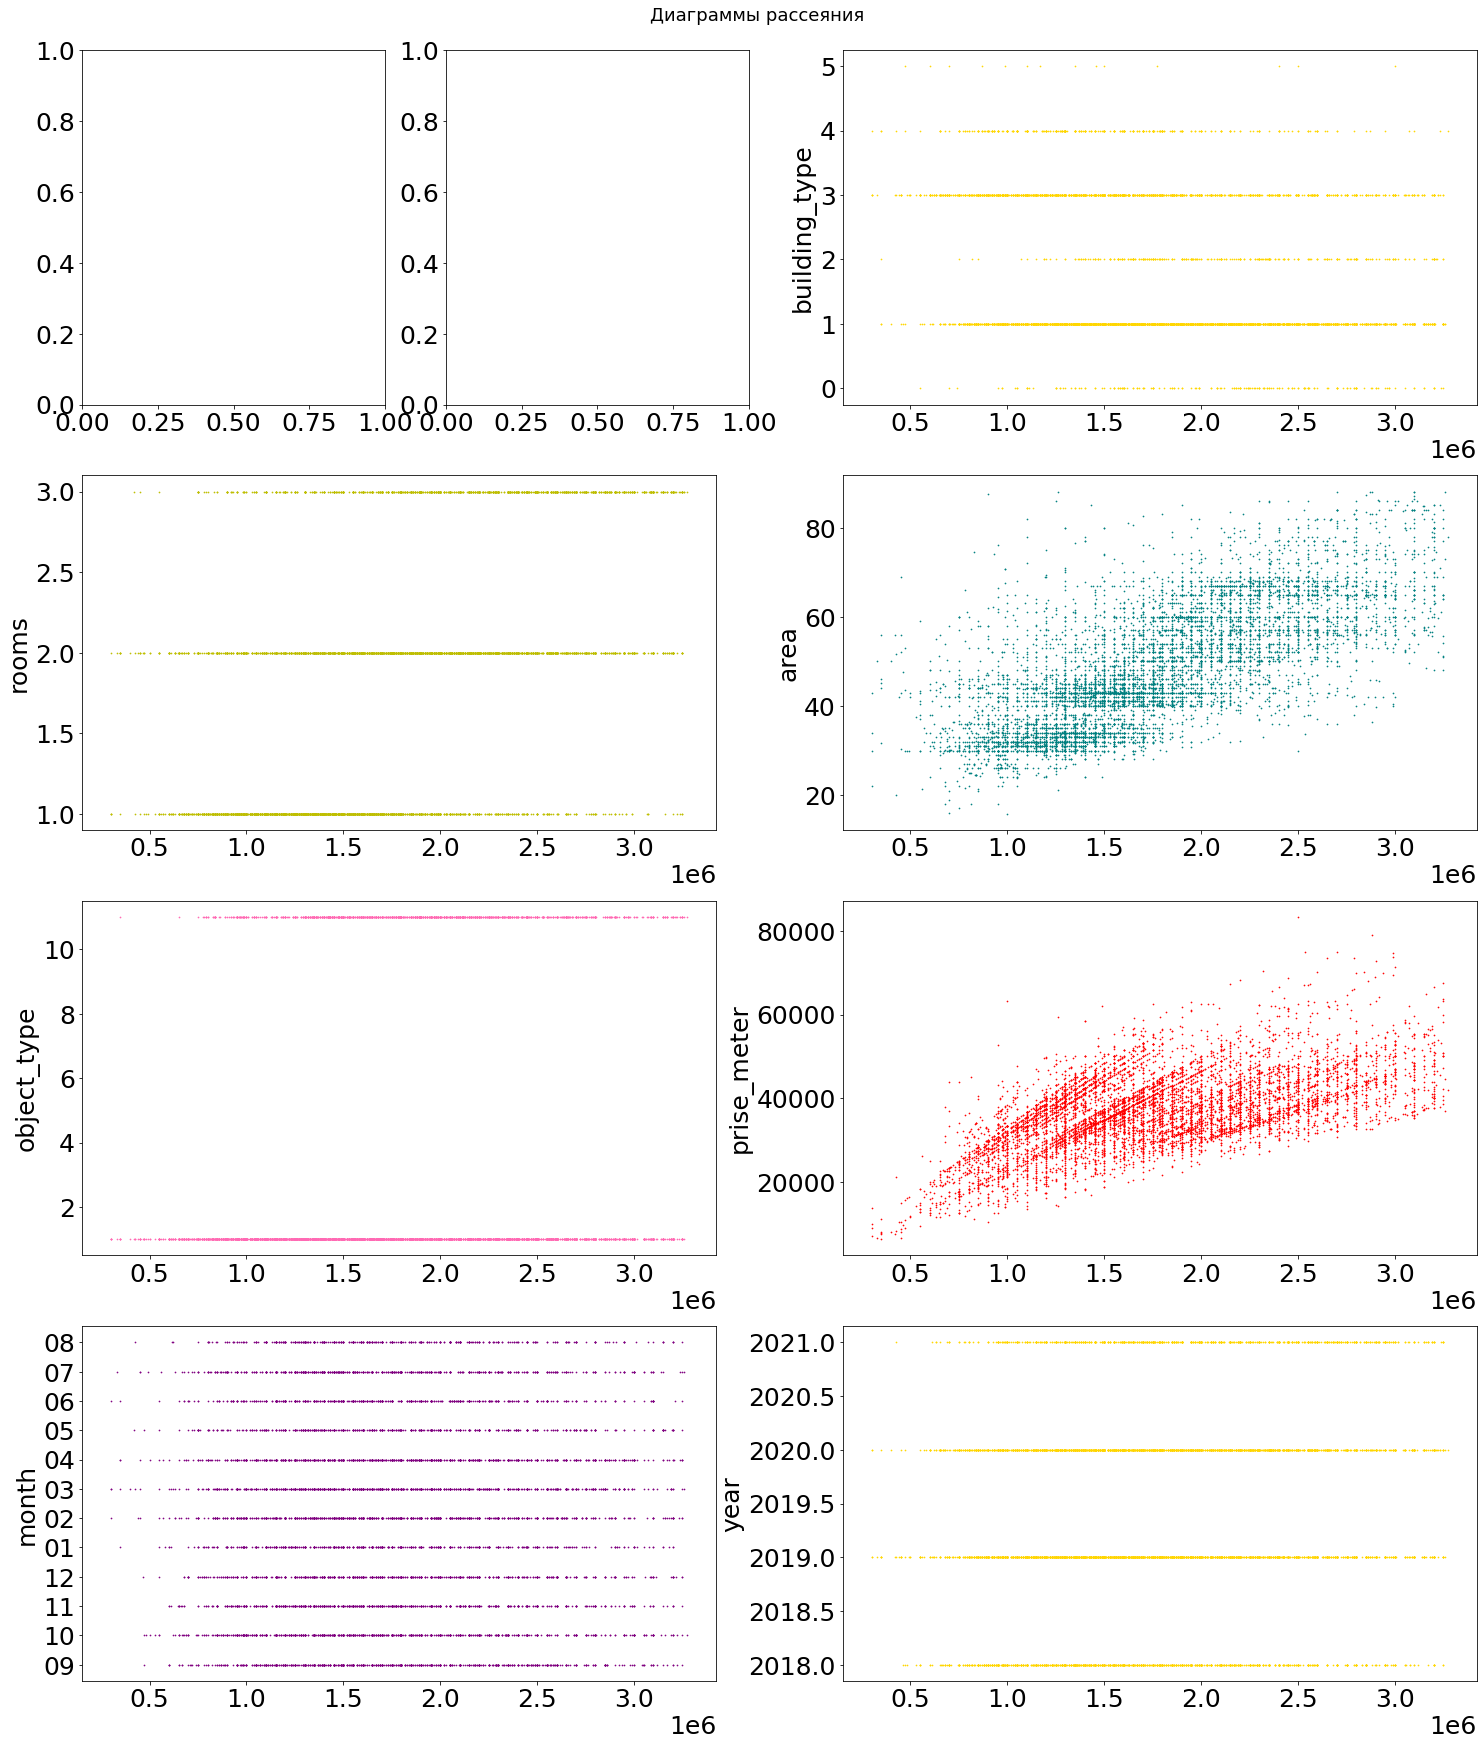

In [29]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(25, 30))
fig.suptitle("Диаграммы рассеяния", fontsize=18, y=0.9)

def painting(s, col, axs):
    plt.subplot(axs)
    plt.plot( 'price', s, "", data=df, linestyle='', marker='o', markersize=0.7, color= col)
    plt.ylabel(s)

    
    
col = ["red", "purple", "gold", "y", "teal", "hotpink","red", "purple", "gold", "y", "teal", "hotpink"]  
lst = [421, 422, 423, 424, 425, 426, 427, 428]
column = df.columns 
counter = 0
for i in range(2, len(column) - 3): 
    painting(column[i], col[i], lst[i - 1])
    counter += 1
for i in range( len(column) - 3, len(column)-1): 
    painting(column[i], col[i], lst[i - 1])
    counter += 1

Проанализируем:
<br>Наиболее дорогой тип здания - панельный, а самый дешевый - кирпичный или монолитный
<br>При одной комнате цена минимальная, а при трех максимальна
<br>Площадь имеет линейную положительную связь с ценой (чем больше площадь, тем больше цена)
<br>Квартира в новостройке будет стоить дороже, нежели квартира вторичного рынка недвижимости
<br>Цена за квадратный метр имеет линейную положительную связь с ценой (чем больше площадь, тем больше цена) - это логично
<br>Что касается месяца, то тут достаточно сложно сделать какие-то выводы, кроме того, что в  4 месяце цена максимальна
<br>Цена в 2020 году является наивысшей

Сохраним полученый файл

In [30]:
filepath = Path('/Users/anastasiakula/Desktop/инфа школьная/out2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath) 

Перейдем к анализу недвижимости Адыгеи. Вся последовательность действий будет полностью совпадать

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637170 entries, 0 to 792867
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          637170 non-null  int64  
 1   region         637170 non-null  int64  
 2   building_type  637170 non-null  int64  
 3   rooms          637170 non-null  int64  
 4   area           637170 non-null  float64
 5   object_type    637170 non-null  int64  
 6   prise_meter    637170 non-null  float64
 7   month          637170 non-null  object 
 8   year           637170 non-null  int64  
 9   flat           637170 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 53.5+ MB


Гистограммы:

/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

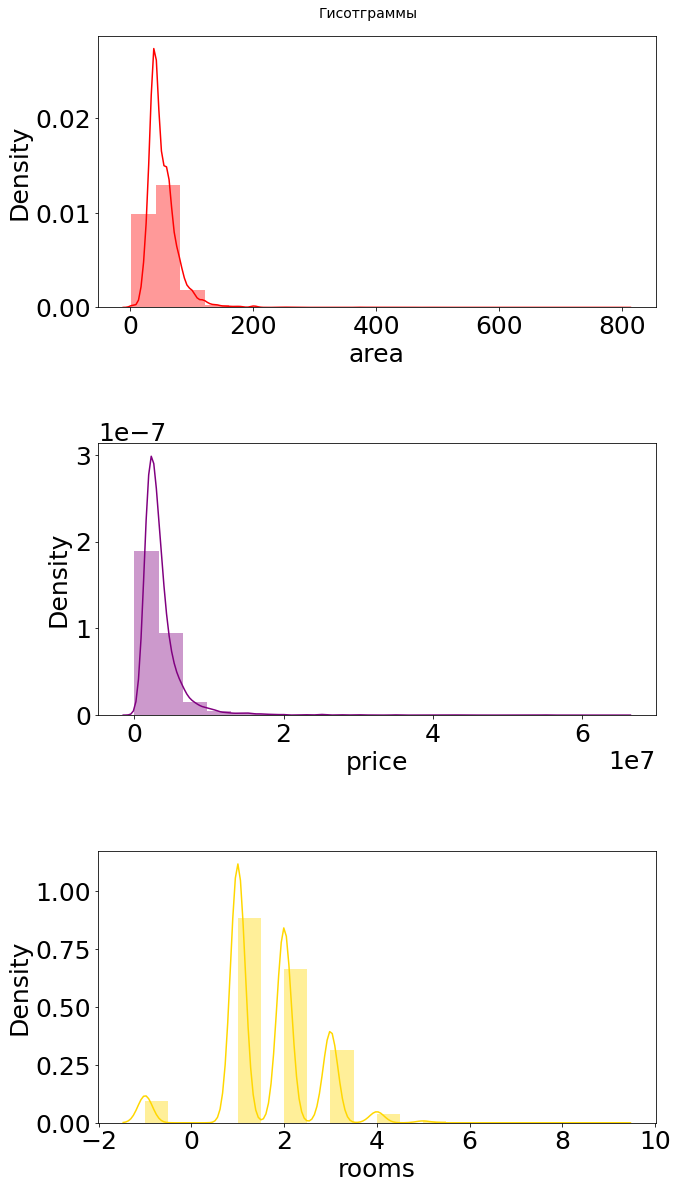

In [32]:
np.random.seed(145644)
to_remove = np.random.choice(df1.index,size=627170,replace=False)
df1 = df1.drop(to_remove)

fig, axs = plt.subplots(3, 1, figsize=(10, 20))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle("Гисотграммы", fontsize=14, y=0.9)

def painting(column: str, col: str, axs: list):
    """
    Функция получает на вход столбец, цвет и позицию, рисует гистограмму по полученным данным
    """
    sns.distplot( a = df1[column], hist = True, kde = True, rug = False, bins=20,  color= col, ax = axs)
    

column = ["area", "price", "rooms"]
col = ["red", "purple", "gold"]
for i in range(len(column)): 
    painting(column[i], col[i], axs[i])

Можно заметить, что площадь колеблится примерно от 10 до 150, причем мода графика примерно равна 50 м2, как и в Челябинской области
Второй график похож на параболлу, при этом часть от 1 далее как гипербола стремится к оси. При этом значения примерно от 0.01 * 1е7  до 1,2 * 1е7 
Третий график показывает, что чаще всего квартира имеет 1 комнату, менее популярна 2 комната, затем 3 и наконец 4 комнаты и студия, причем студия чуть более поуплярна.
Построим диаграммы размаха, чтобы избавиться от выбросов

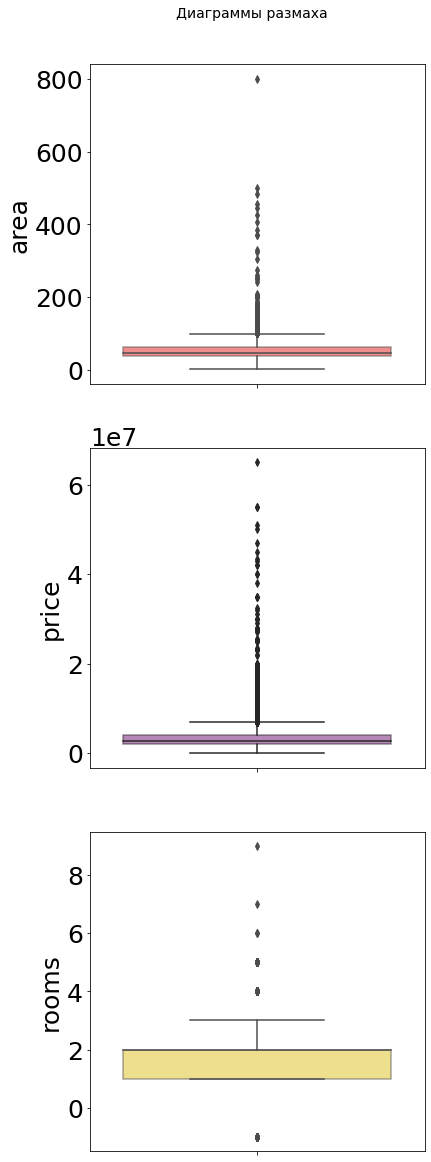

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(6, 20))
plt.subplots_adjust(hspace=0.2)
fig.suptitle("Диаграммы размаха", fontsize=14, y=0.92)

def painting(column, col, axs):
    """
    Функция получает на вход столбец, цвет и позицию, рисует диаграмму размаха по полученным данным
    """
    sns.boxplot(y=df1[column], color= col, ax = axs,  boxprops=dict(alpha=.5))
    
    
column = ["area", "price", "rooms"]
col = ["red", "purple", "gold"]
for i in range(len(column)): 
    painting(column[i], col[i], axs[i])

Избавимся от выбросов и снова построим диаграммы размаха

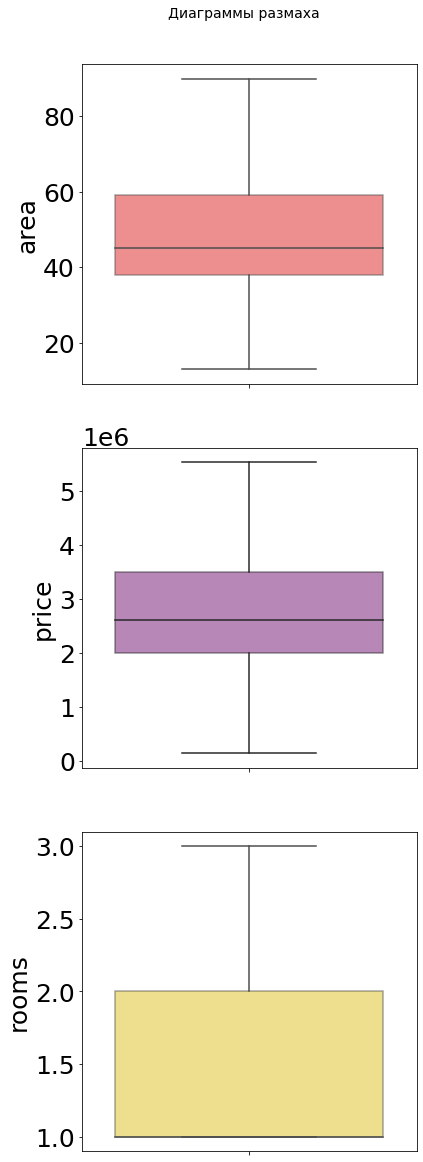

In [34]:
Q1 =  df1["area"].quantile(0.3)
Q3 = df1["area"].quantile(0.7)
IQR = Q3 - Q1
df1 = df1.query("@Q1 - 1.5*@IQR < area < @Q3 + 1.5*@IQR")
Q1 =  df1["price"].quantile(0.3)
Q3 = df1["price"].quantile(0.7)
IQR = Q3 - Q1
df1 = df1.query("@Q1 - 1.5*@IQR < price < @Q3 + 1.5*@IQR")
Q1 =  df1["rooms"].quantile(0.25)
Q3 = df1["rooms"].quantile(0.75)
IQR = Q3 - Q1
df1 = df1.query("@Q1 - 1.5*@IQR < rooms < @Q3 + 1.5*@IQR")

fig, axs = plt.subplots(3, 1, figsize=(6, 20))
plt.subplots_adjust(hspace=0.2)
fig.suptitle("Диаграммы размаха", fontsize=14, y=0.92)

def painting(column, col, axs):
    """
    Функция получает на вход столбец, цвет и позицию, рисует диаграмму размаха по полученным данным
    """
    sns.boxplot(y=df1[column], color= col, ax = axs,  boxprops=dict(alpha=.5))
    
    
column = ["area", "price", "rooms"]
col = ["red", "purple", "gold"]
for i in range(len(column)): 
    painting(column[i], col[i], axs[i])



Сводная таблица со значением средней цены по месяцам и построим по ней линейную диаграмму:

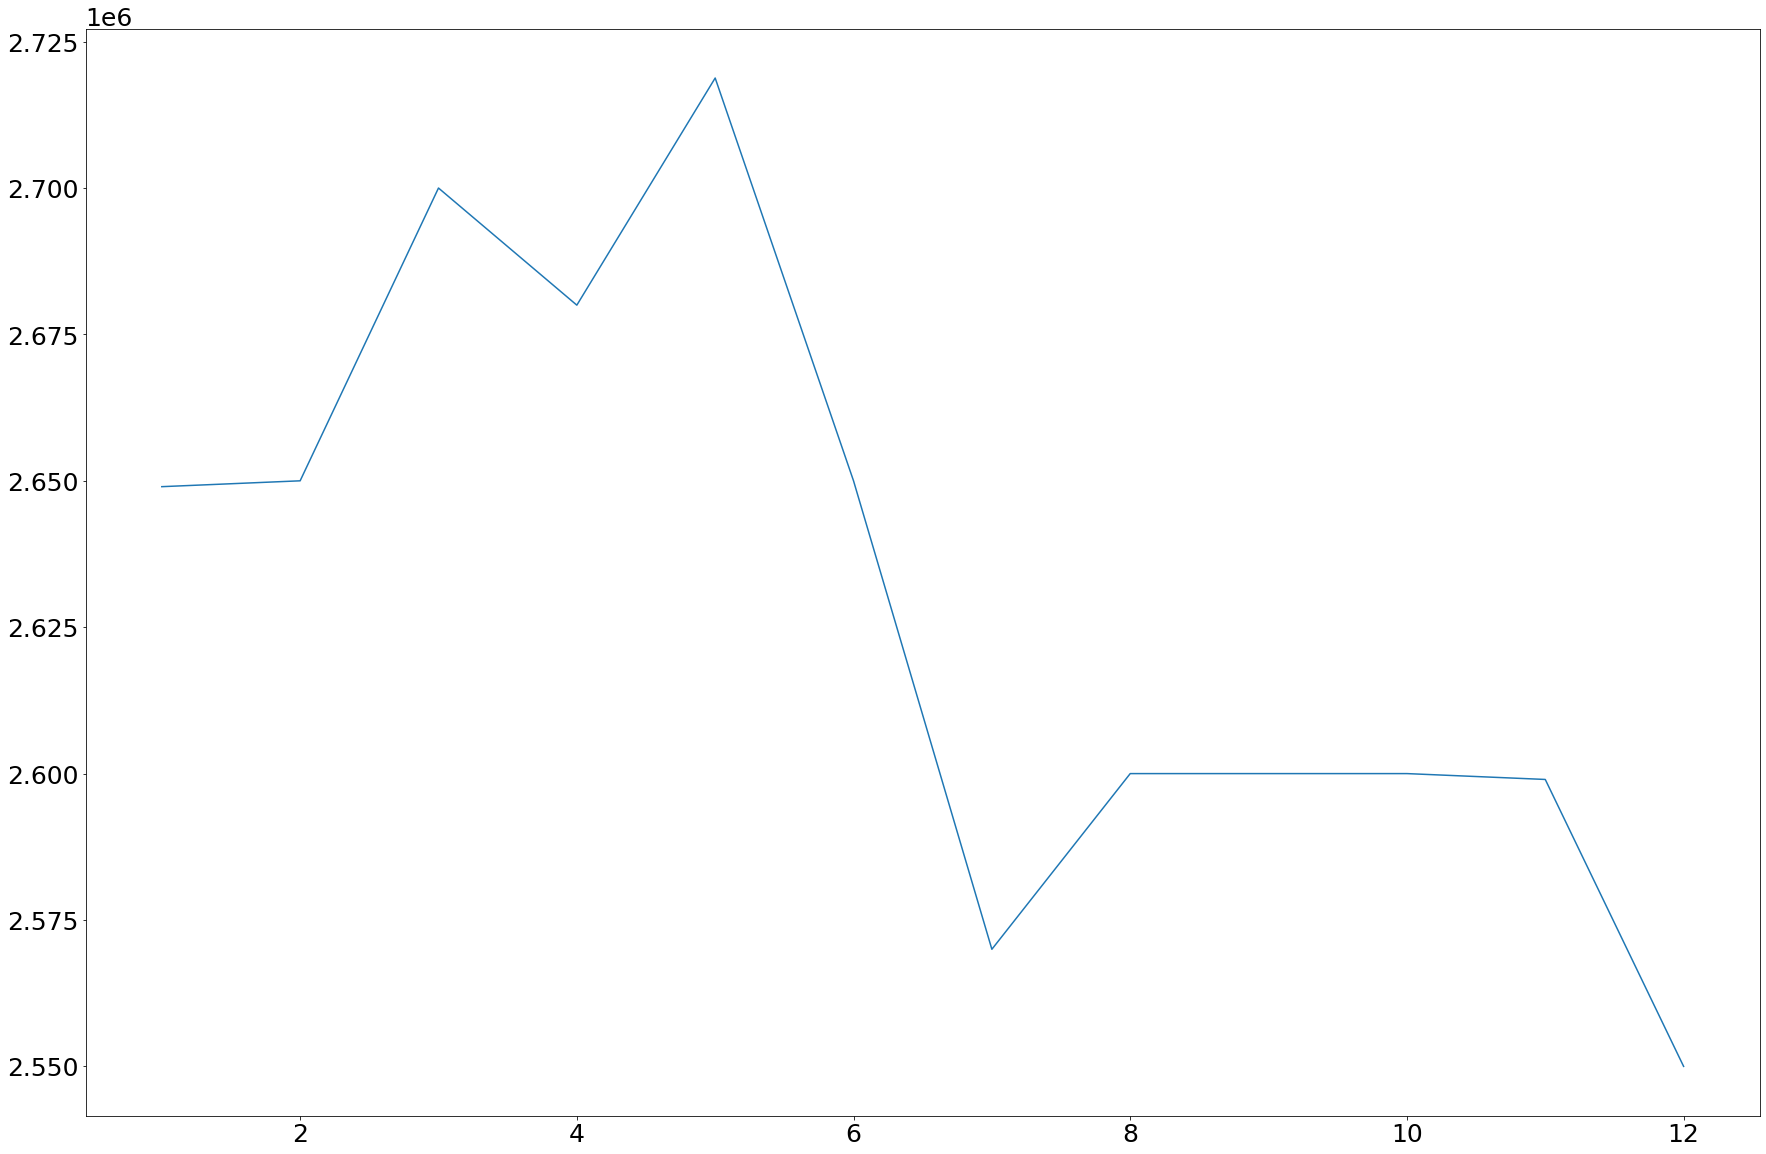

In [35]:
df2 = pd.pivot_table(df1,
               index = ["month"],
               values = ["price"],
               aggfunc = [np.median])
df2.head(12)
df2["month"] = [int(i) for i in range(1, 13)]
df2.columns = ["price", "month"]

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(30)
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 25}
plt.rc('font', **font)

plt.plot(df2["month"], df2['price'])

plt.show()



Из графика видно, что минимальная цена приходиться на 12 месяц, а максимлаьная на 5
Построим корреляционную матрицу:

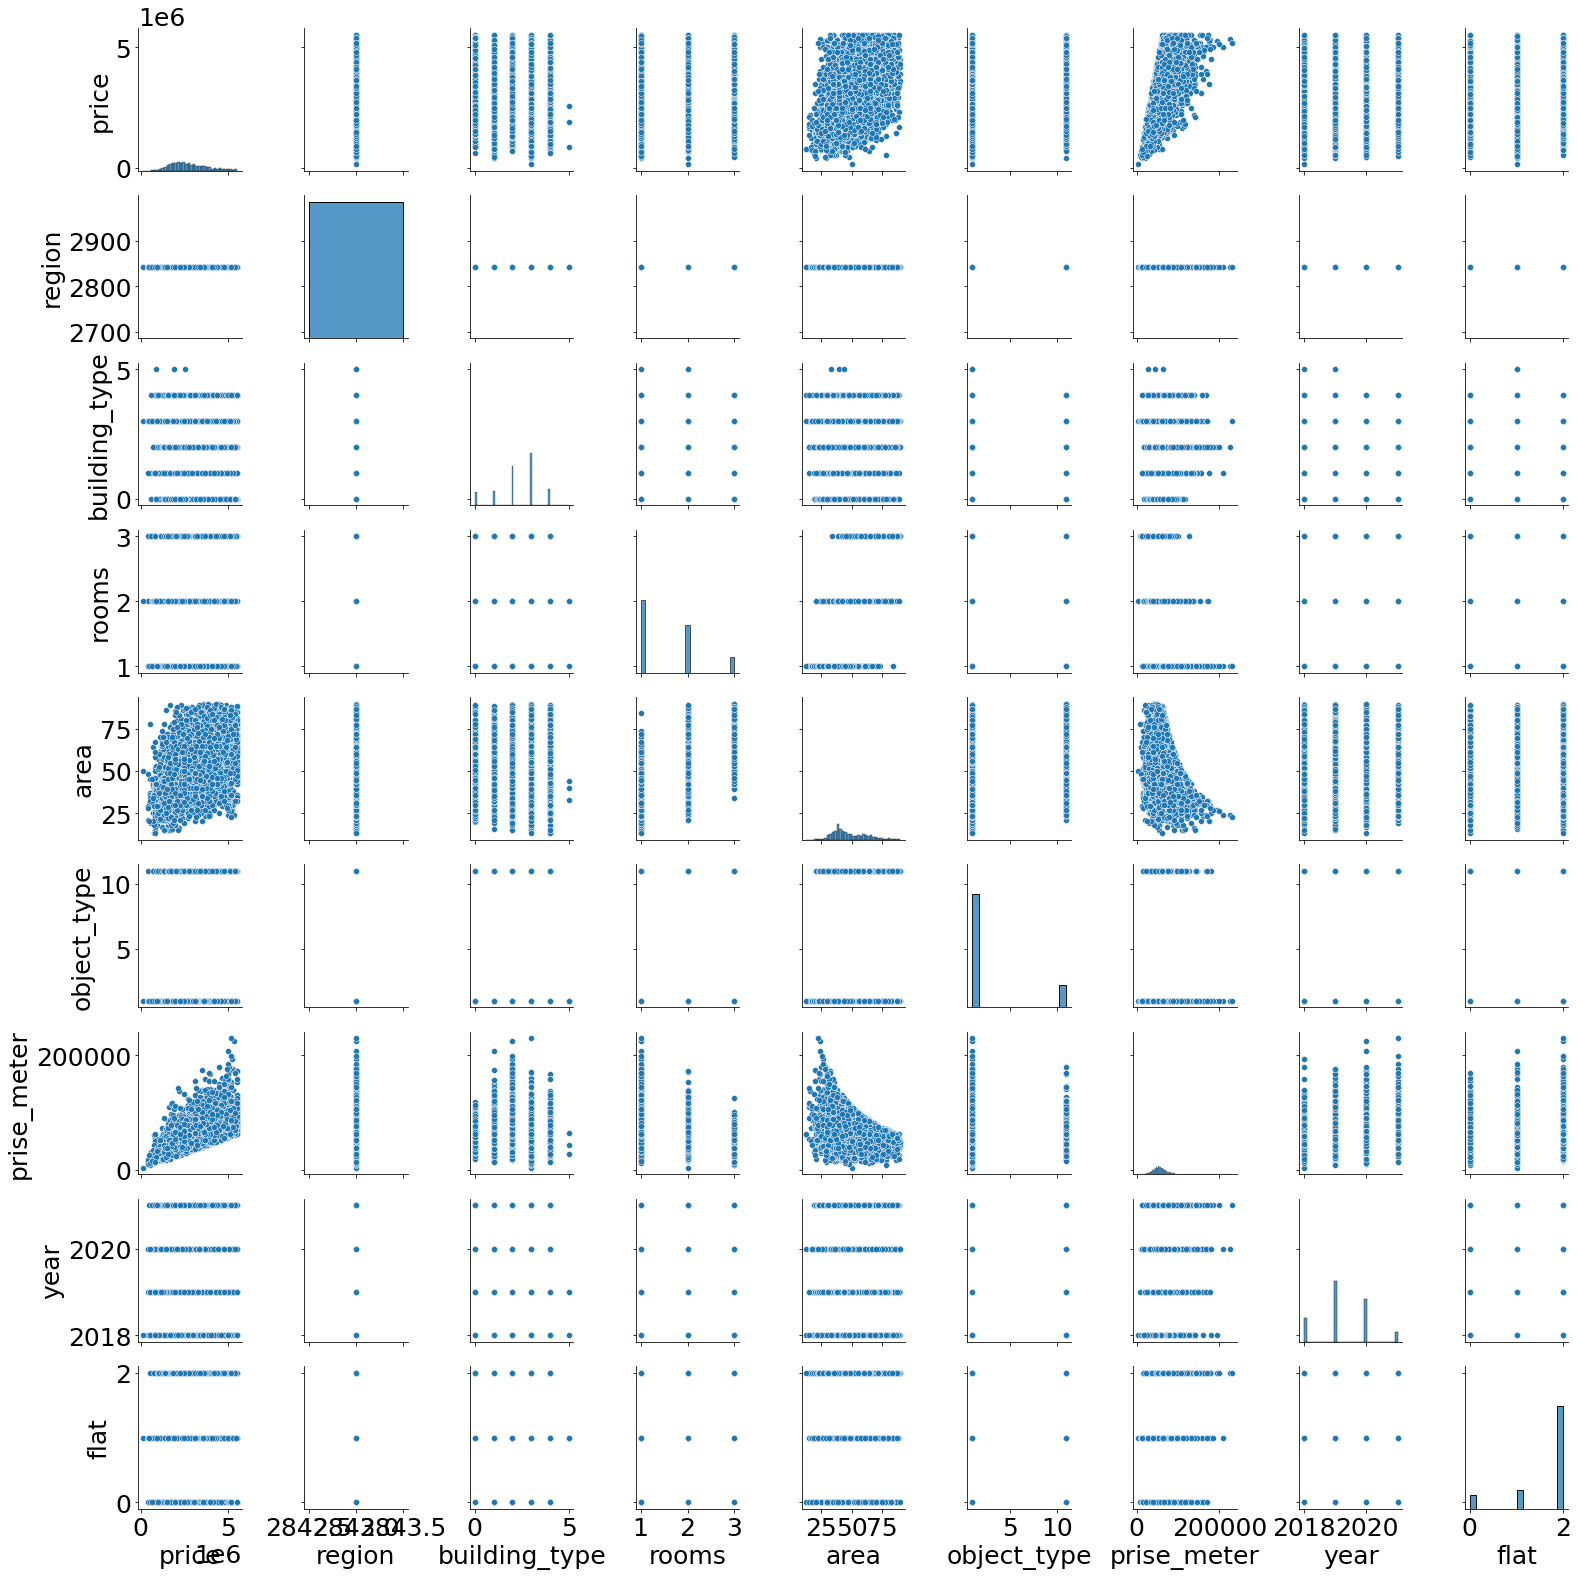

In [36]:
sns.pairplot(df1)

И тепловую карту

<AxesSubplot:>

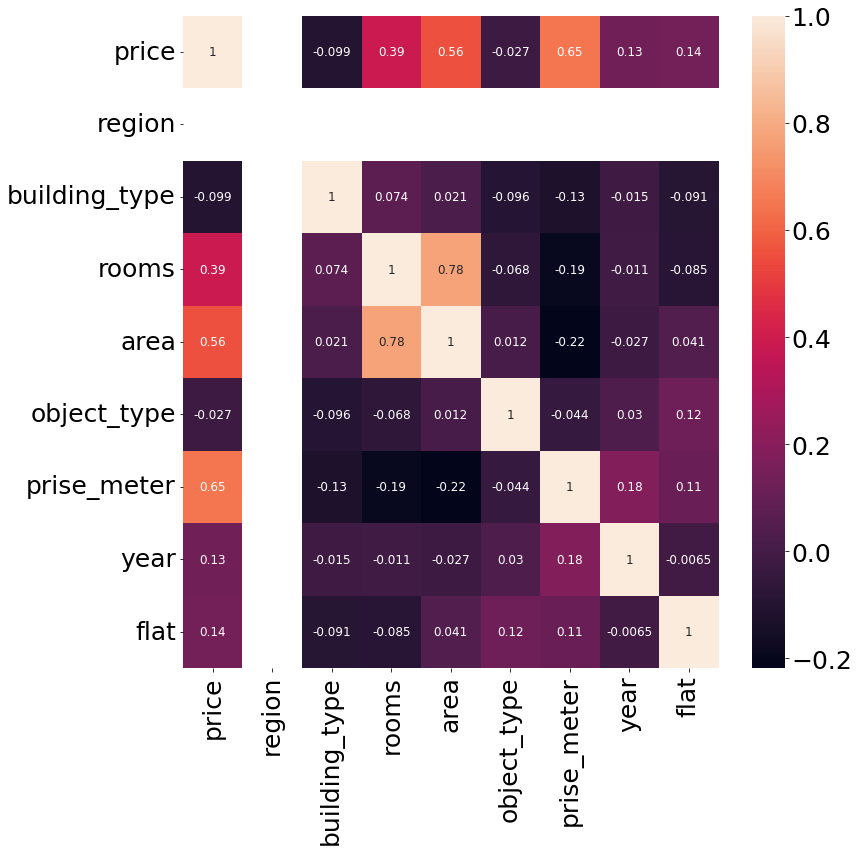

In [37]:
fig, (ax1) = plt.subplots( figsize=(12,12))
sns.heatmap(df1.corr(), annot = True,  annot_kws={'fontsize':12})

Проанализирем тепловую диаграмму:
<br>от года мало что зависит, там все строчка/столбец примерно одинаковы, кроме цены за квадратный метр
<br>этаж примерно одинаково зависит от года и площади и примерно одиноково зависит от количества комнат и типа строения
<br>площадь примерно одинаково зависит от типа строения, этажа и типа объекта
<br>цена за метр примерно одинаково зависит от количества комнат и площади
<br>запомним, что возможно будет полезно удалить столбец rooms, когда будем предсказывать цену
<br>Построим диаграммы рассеяния:


/var/folders/rt/mvnmln8j70d9fmnh5b6pl1qr0000gn/T/ipykernel_95135/2117965873.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'price', s, "", data=df1, linestyle='', marker='o', markersize=0.7, color= col)
/var/folders/rt/mvnmln8j70d9fmnh5b6pl1qr0000gn/T/ipykernel_95135/2117965873.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'price', s, "", data=df1, linestyle='', marker='o', markersize=0.7, color= col)
/var/folders/rt/mvnmln8j70d9fmnh5b6pl1qr0000gn/T/ipykernel_95135/2117965873.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'price', s, "", data=df1, linestyle='', marker='o', marke

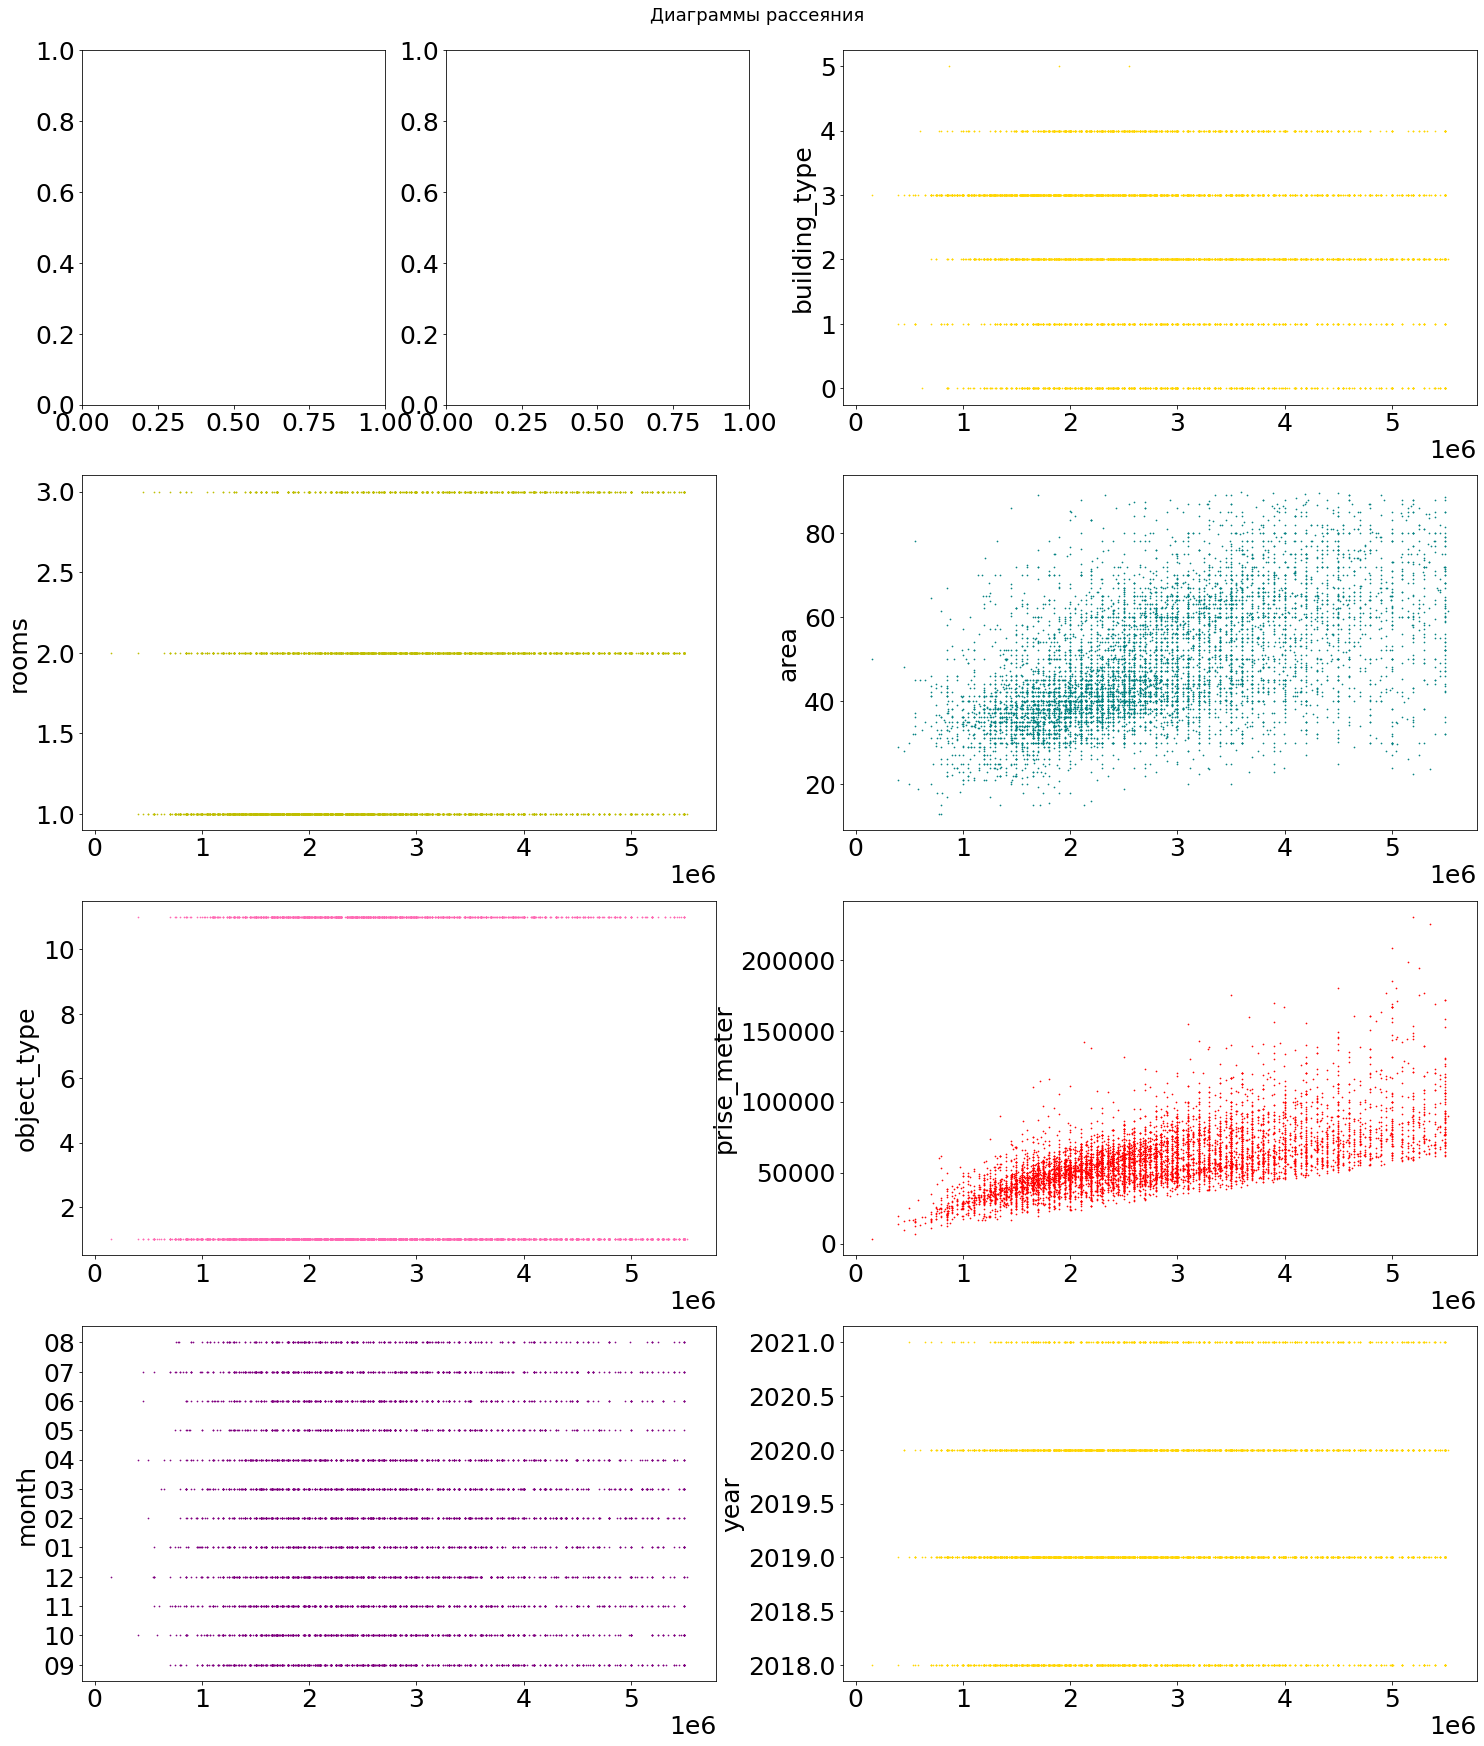

In [38]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(25, 30))
fig.suptitle("Диаграммы рассеяния", fontsize=18, y=0.9)

def painting(s, col, axs):
    plt.subplot(axs)
    plt.plot( 'price', s, "", data=df1, linestyle='', marker='o', markersize=0.7, color= col)
    plt.ylabel(s)

    
    
col = ["red", "purple", "gold", "y", "teal", "hotpink","red", "purple", "gold", "y", "teal", "hotpink"]  
lst = [421, 422, 423, 424, 425, 426, 427, 428]
column = df.columns 
counter = 0
for i in range(2, len(column) - 3): 
    painting(column[i], col[i], lst[i - 1])
    counter += 1
for i in range( len(column) - 3, len(column)-1): 
    painting(column[i], col[i], lst[i - 1])
    counter += 1



Проанализируем:
<br>Наиболее дорогой тип здания - монолитный, а самый дешевый - кирпичный
<br>При одной комнате цена минимальная, а при трех или двух максимлаьна
<br>Площадь имеет линейную положительную связь с ценой (чем больше площадь, тем больше цена)
<br>Квартира в новостройке будет стоить не сильно дороже, чем квартира вторичного рынка недвижимости
<br>Цена за квадратный метр имеет линейную положительную связь с ценой (чем больше площадь, тем больше цена) - это логично
<br>Самый выгодный для покупки месяц сложно определить
<br>Цена в 2020 году является наивысшей

<br>Сохраним полученый файл

In [39]:
filepath = Path('/Users/anastasiakula/Desktop/инфа школьная/out3.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df1.to_csv(filepath) 

## Вывод
Я проанализировала данные по двум регионам, удалила все выбросы, а также попыталась найти закономерности. В процессе работы я освоила новые типы диаграмм и графиков. Также я поняла для себя, что анализ графиков - это сложно. Конечно линейную диаграмму и диаграмму размаха проагнализировать лего, но вот что касается диаграммы размаха - тут достаточно сложно понять, какое значение дейтсвительно соответсвует наибольшей ценц. Также я не до конца разобралась с тепловой картой, а конкретно с тем, как грамотно искать закономерности в ней. Но я пыталась. Также я научилась сохранять обработанные данные в отдельный файл, причем с возможностью указать его путь. 